In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\nkonz\Desktop\Data Analyst Portfolio Project\Python_Dataset/movies.csv')

In [4]:
# Now let's take a look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
# Let's loop through the data and see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [8]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [9]:
# Change data type of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [13]:
#Create a correct year coumn
df['correctyear'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [15]:
#Drop duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [17]:
# Sort our data

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

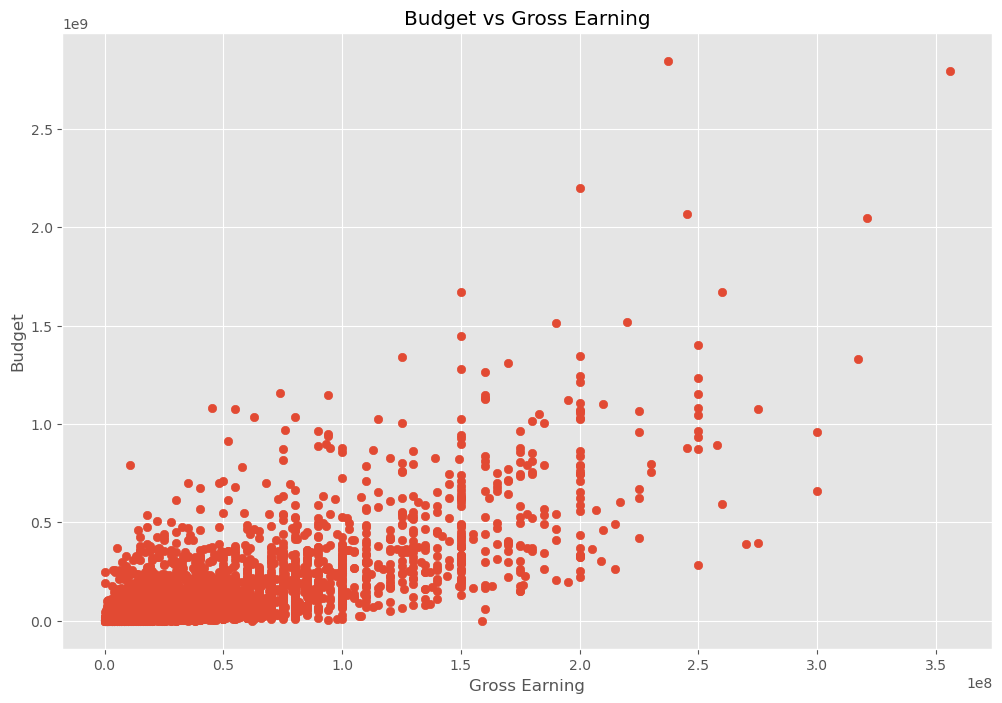

In [23]:
#Scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earning')
plt.ylabel('Budget')
plt.show()

<AxesSubplot:xlabel='gross', ylabel='budget'>

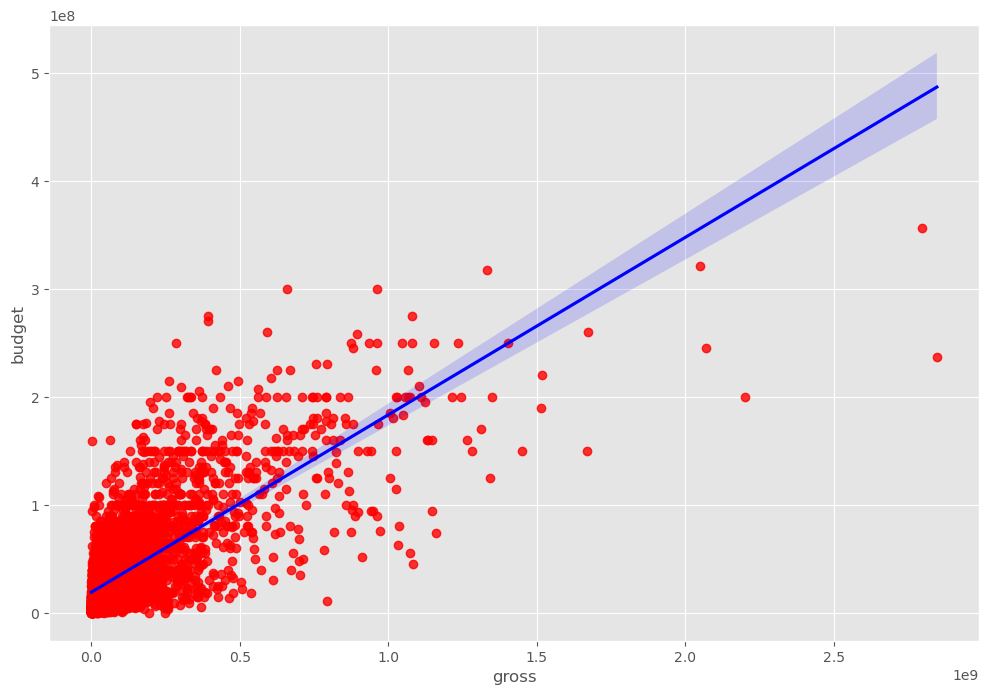

In [22]:
#Plot the 'budget vs gross' using seabon in order to see the correlation
sns.regplot(x="gross", y="budget", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

<AxesSubplot:xlabel='score', ylabel='gross'>

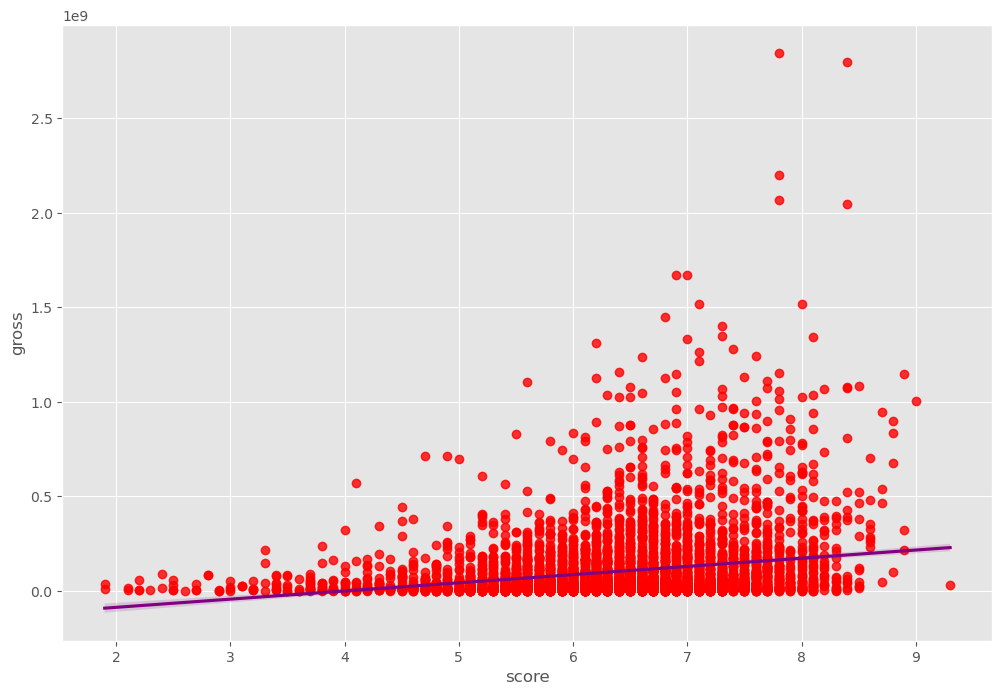

In [26]:
sns.regplot(x="score", y="gross", data=df, scatter_kws={"color": "red"}, line_kws={"color": "purple"})

In [32]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,score,votes,budget,gross,runtime,correctyear
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
correctyear,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [33]:
df.corr(method ='kendall')

,score,votes,budget,gross,runtime,correctyear
score,1.000000,0.350185,-0.006406,0.124943,0.292254,0.043400
votes,0.350185,1.000000,0.346274,0.553625,0.205344,0.293044
budget,-0.006406,0.346274,1.000000,0.512057,0.231278,0.213719
gross,0.124943,0.553625,0.512057,1.000000,0.176979,0.232372
runtime,0.292254,0.205344,0.231278,0.176979,1.000000,0.064793
correctyear,0.043400,0.293044,0.213719,0.232372,0.064793,1.000000


In [34]:
df.corr(method ='spearman')

,score,votes,budget,gross,runtime,correctyear
score,1.000000,0.495409,-0.009971,0.183192,0.412155,0.063674
votes,0.495409,1.000000,0.493461,0.745793,0.300621,0.422988
budget,-0.009971,0.493461,1.000000,0.692958,0.330794,0.302535
gross,0.183192,0.745793,0.692958,1.000000,0.257400,0.340529
runtime,0.412155,0.300621,0.330794,0.257400,1.000000,0.095507
correctyear,0.063674,0.422988,0.302535,0.340529,0.095507,1.000000


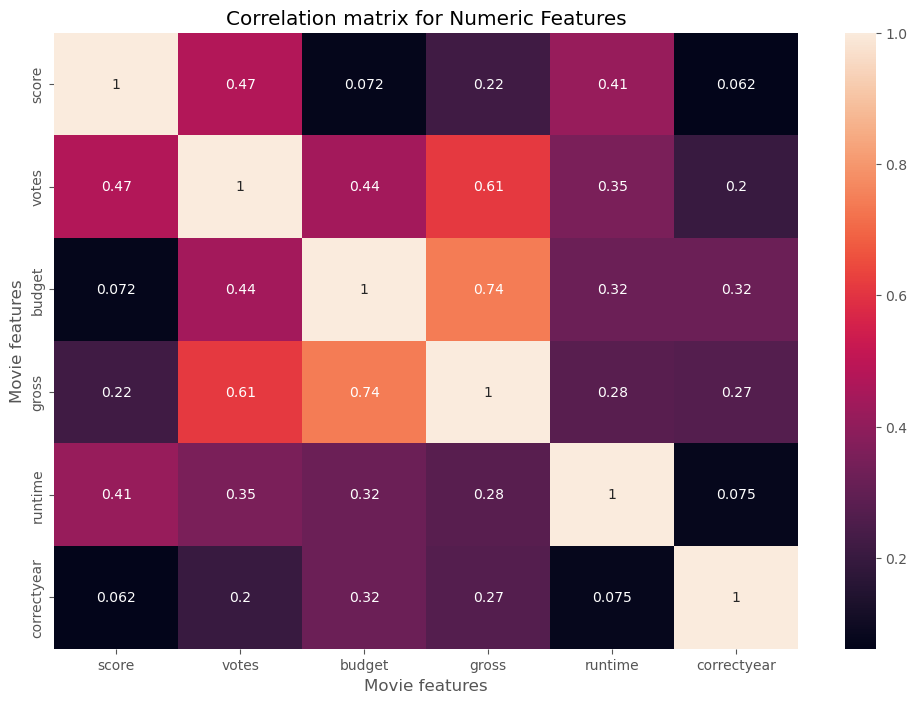

In [36]:
correlation_matrix = df.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [41]:
#Numerize the company column and other non-numeric columns

df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
                
df_numerized

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,386,5,0,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96.0,2015
2434,2969,5,0,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97.0,1994
3681,1595,3,6,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108.0,2001
272,2909,6,9,1525,3.9,2300,261,55,1473,47,800000,2270,582,85.0,1982


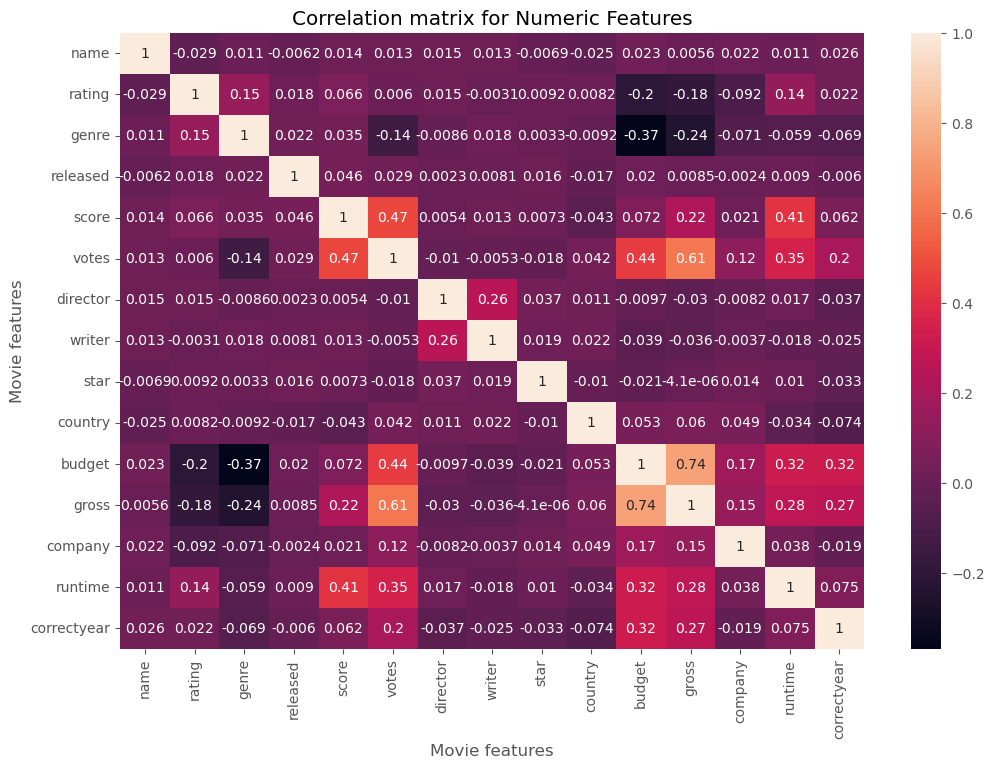

In [42]:
correlation_matrix = df_numerized.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [43]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             released      -0.006152
             score          0.014450
                              ...   
correctyear  budget         0.320312
             gross          0.268721
             company       -0.018806
             runtime        0.075294
             correctyear    1.000000
Length: 225, dtype: float64

In [44]:
sorted_pairs = corr_pairs.sort_values
sorted_pairs

<bound method Series.sort_values of name         name           1.000000
             rating        -0.029234
             genre          0.010996
             released      -0.006152
             score          0.014450
                              ...   
correctyear  budget         0.320312
             gross          0.268721
             company       -0.018806
             runtime        0.075294
             correctyear    1.000000
Length: 225, dtype: float64>

In [49]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
1426    54610959970
1397    51241105418
452     42356430218
1108    40021704691
1382    39542573303
1423    35833650748
1044    19612851164
983     15065592411
550     11873612858
551     11593807697
1367    10664679494
1001     8937010092
1309     8318570396
1134     7886344526
682      7243673721
Name: gross, dtype: int64